<a href="https://colab.research.google.com/github/pingkivila/DigitalSkola_DataScience11/blob/main/Advanced_Statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Statistic
created by Ari Pingki Vila Tri Wahyuni

This notebook is created to teach student about an advanced statistic. All the code is free to reuse by everyone.

**Contents**
- Statistical Sampling
- Hypothesis Testing
- A/B Testing
- Homework
_____

In [ ]:
# !pip install --upgrade statsmodels

In [ ]:
# import library
import pandas as pd
import numpy as np

import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
import math

In [ ]:
# read dataset
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/Transformer.csv")
data.head()

,Unnamed: 0,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation,event
0,0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,19.0,Not Working
1,1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5,19.0,Not Working
2,2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3,19.0,Not Working
3,3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3,6.0,Not Working
4,4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2,6.0,Not Working


## **Statistical Sampling**
There are three statistical sampling in applied machine learning
- Simple Random Sampling
- Systematic Sampling
- Stratified Sampling

Let's code!!
_____

### Simple Random Sampling

In [ ]:
data.sample(n=100)

,Unnamed: 0,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation,event
40,40,3060,257,69500,190,403,8930,68,47,0,0.0,73.20,29,56,14,50.7,29.8,Not Working
435,435,0,448,38900,2,24,482,0,99,0,0.0,4.39,31,53,12,13.4,51.0,Working
273,273,28,289,50300,5,157,787,3,51,0,0.0,1.00,32,59,31,13.4,51.0,Working
446,446,11,1780,56900,2,29,867,0,54,0,0.0,2.78,31,50,27,13.4,51.0,Working
302,302,10,254,56500,4,71,1020,0,108,0,0.0,1.00,32,53,22,13.4,51.0,Working
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,316,8,1210,27000,3,166,454,0,43,0,0.0,1.00,32,55,18,13.4,51.0,Working
175,175,12,15200,62800,4,413,4720,5,0,0,5.0,0.53,44,56,14,38.3,6.5,Not Working
295,295,21,243,48800,0,19,187,0,65,0,0.0,1.00,30,57,18,13.4,51.0,Working
443,443,11,15600,45000,3,309,2240,0,3,0,147.0,0.50,39,53,3,13.4,19.1,Working


### **Systematic Sampling**

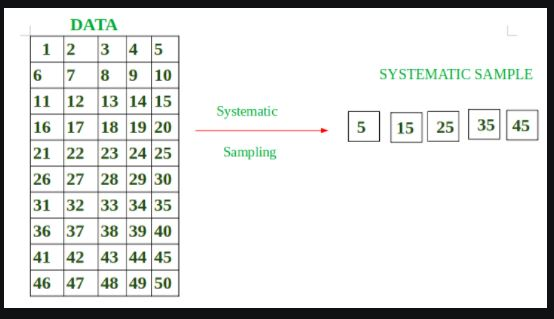

In [ ]:
indexes = np.arange(0, len(data), step=5)
data.iloc[indexes]

,Unnamed: 0,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation,event
0,0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,19.0,Not Working
5,5,13500,343,36500,3150,113,984,5,1230,1,1.0,4.93,37,52,6,75.6,6.0,Not Working
10,10,4,26100,60600,1,206,1440,13,0,13,5.0,1.32,40,56,4,63.4,6.0,Not Working
15,15,13200,1120,32800,2650,156,2240,16400,1610,1510,0.0,1.00,45,58,22,60.5,19.0,Not Working
20,20,590,23200,63900,949,209,51,828,168,582,0.0,1.00,45,55,4,60.5,6.9,Not Working
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,445,11,1770,48600,0,30,593,0,60,0,0.0,3.97,31,58,29,13.4,51.0,Working
450,450,17,262,47400,2,46,1050,4,97,0,0.0,1.00,33,57,26,13.4,51.0,Working
455,455,17,564,14600,5,320,2450,0,0,0,1.0,1.07,45,52,6,13.4,19.0,Working
460,460,12,151,48200,2,34,569,4,48,0,0.0,1.00,31,58,20,13.4,51.0,Working


### **Stratified Sampling**

In [ ]:
working = data[data['event'] == 'Working']
working.head()

,Unnamed: 0,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation,event
235,235,48,71,21093,3,36,673,4,144,0,0.0,2.56,30,58,26,13.4,51.0,Working
236,236,48,252,56800,2,62,651,0,112,0,0.0,3.04,33,54,16,13.4,51.0,Working
237,237,48,289,57400,3,56,650,5,132,0,0.0,4.22,31,55,13,13.4,51.0,Working
238,238,47,400,48200,4,74,621,0,57,0,0.0,1.00,32,54,20,13.4,51.0,Working
239,239,47,366,44500,2,88,966,5,73,0,0.0,1.00,38,57,15,13.4,51.0,Working


In [ ]:
data.groupby(['event'], as_index=True).apply(lambda x: x.sample(n=200, random_state=50))

Unnamed: 0  Hydrogen  ...  Life expectation        event
event                                  ...                               
Not Working 162         162         0  ...              32.0  Not Working
            97           97         0  ...              17.9  Not Working
            82           82         4  ...              31.1  Not Working
            118         118        54  ...              32.0  Not Working
            144         144         4  ...              32.0  Not Working
...                     ...       ...  ...               ...          ...
Working     350         350         6  ...              51.0      Working
            295         295        21  ...              51.0      Working
            261         261        33  ...              51.0      Working
            452         452        17  ...              51.0      Working
            340         340         6  ...              51.0      Working

[400 rows x 18 columns]

## **Hypothesis Testing**
- Z-test one sample
- T-test one sample
- T-test two sample
- Chi-square
_____

#### Z-test
Let's say we need to determine if the CO2 that is generated by transformer when it is working has average score higher than 2257. We have the information that the standard deviation for the working transformer of CO2 is 2257. So, we collect the 35 data of CO2 of the working transformer by using random samples.

Set tge significance level to be 0.05

In [ ]:
#populasi
pop_std = data['CO2'].std()
pop_avg = data['CO2'].mean()

print("Population - STD:",round(pop_std))
print("Population - mean:",round(pop_avg))

Population - STD: 2257
Population - mean: 1816


In [ ]:
# set the value
confidence_level = 0.95
alpha = 1-confidence_level


# get the random sample
sample_data_z = working['CO2'].sample(n=35)

# ztest hypothesis
ztest_Score, pvalue = ztest(x1=sample_data_z, x2=None, value=pop_avg, alternative='larger')
print("Z-score: ",round(ztest_Score,3))
print("Pvalue: ",round(pvalue,3))

# test
if pvalue < alpha:
  print("Reject the hypothesis")
  print("Because the pvalue {} < {:.2f}".format(round(pvalue,3), alpha))
else:
  print("Accept the hypothesis")
  print("Because the pvalue {} > {:.2f}".format(round(pvalue,3), alpha))

Z-score:  -0.936
Pvalue:  0.825
Accept the hypothesis
Because the pvalue 0.825 > 0.05


#### T-test

Let's say we want to determine if the average of Oxygen less than 8357 in the working transformer. We don't have any information about variance (or standard deviation) for the working transformer. To perform a t-test, we randomly collect 20 data and the confidence level is 95%.

In [ ]:
#populasi
O_pop_std = data['Oxigen'].std()
O_pop_avg = data['Oxigen'].mean()

print("Population - STD:",round(O_pop_std))
print("Population - mean:",round(O_pop_avg))

Population - STD: 14164
Population - mean: 8357


In [ ]:
# set the value
confidence_level = 0.95
alpha = 1-confidence_level


# get the random sample
sample_data_t = working['Oxigen'].sample(n=20)

# ttest hypothesis
ttest_Score, pvalue = stats.ttest_1samp(sample_data_t, O_pop_avg, alternative='less') #, alternative="greater"
 
# test
if alpha >= pvalue:
  print("Reject the hypothesis")
  print("Because the pvalue {:.2f} < {:.2f}".format(pvalue, alpha))
else:
  print("Accept the hypothesis")
  print("Because the pvalue {:.2f} > {:.2f}".format(pvalue, alpha))

Accept the hypothesis
Because the pvalue 0.49 > 0.05


#### Z-test - Two sample
Z-test - Two sample
We want to investigate whether the means of methane both working and not working transformer are not the same. We don't have any informaton of variance for the working and not working transformer. We set the confidence level at 95%

In [ ]:
# Oxygen - working transformer
working = data[data['event']=="Working"]
p_working_Methane = working['Methane'].mean()
s_working_Methane = working['Methane'].sample(30)

# Oxygen - not working transformer
not_working = data[data['event']=="Not Working"]
p_n_working_Methane = not_working['Methane'].mean()
s_n_working_Methane = not_working['Methane'].sample(30)

# Difference between population 
difference = p_working_Methane-p_n_working_Methane
# print('Difference between population mean: {:.2f}'.format(difference))

# ttest hypothesis
ttest_Score, pvalue = ztest(x1=s_working_Methane, x2=s_n_working_Methane, value=0) 

# test
if alpha > pvalue:
  print("Reject the hypothesis")
  print("Because the pvalue {:.2f} < {:.2f}".format(pvalue, alpha))
else:
  print("Accept the hypothesis")
  print("Because the pvalue {:.2f} > {:.2f}".format(pvalue, alpha))

Accept the hypothesis
Because the pvalue 0.10 > 0.05


#### T-test - Two sample

We want to investigate whether the means of oxygen both working and not working transformer are not the same. We don't have any informaton of variance for the working and not working transformer. We set the confidence level at 95%

In [ ]:
# Oxygen - working transformer
working = data[data['event']=="Working"]
p_working_oxygen = working['Oxigen'].mean()
s_working_oxygen = working['Oxigen'].sample(15)

# Oxygen - not working transformer
not_working = data[data['event']=="Not Working"]
p_n_working_oxygen = not_working['Oxigen'].mean()
s_n_working_oxygen = not_working['Oxigen'].sample(15)

# Difference between population 
difference = p_working_oxygen-p_n_working_oxygen
# print('Difference between population mean: {:.2f}'.format(difference))

# ttest hypothesis
ttest_Score, pvalue = stats.ttest_ind(a=s_working_oxygen, b=s_n_working_oxygen, equal_var=False) #, alternative='two-sided'

# test
if alpha > pvalue:
  print("Reject the hypothesis")
  print("Because the pvalue {:.2f} < {:.2f}".format(pvalue, alpha))
else:
  print("Accept the hypothesis")
  print("Because the pvalue {:.2f} > {:.2f}".format(pvalue, alpha))

Reject the hypothesis
Because the pvalue 0.05 < 0.05


#### Chi-Square

We want to investigate whether the five variables (event, CO, CO2, Methane, and Hydrogen) are related to each other. Therefore, the hypothesis using chi square can be implemented to analyse them.

- H0: they are related to each other (dependent)
- H1: they are not related (independent)

In [ ]:
chi_s = data[['event','CO','CO2','Methane','Hydrogen']]
chi_s = chi_s.set_index('event')
chi_s.head()

,CO,CO2,Methane,Hydrogen
event,,,,
Not Working,32,1344,7406,2845
Not Working,83,864,877,12886
Not Working,257,1080,144,2820
Not Working,184,1402,545,1099
Not Working,360,2130,160,3210


In [ ]:
from scipy.stats import chi2_contingency
stat, pvalue, dof, expected = chi2_contingency(chi_s)

alpha = 0.05

# test
if alpha > pvalue:
  print("Reject the hypothesis")
  print("Because the pvalue {:.2f} < {:.2f}".format(pvalue, alpha))
else:
  print("Accept the hypothesis")
  print("Because the pvalue {:.2f} > {:.2f}".format(pvalue, alpha))

Reject the hypothesis
Because the pvalue 0.00 < 0.05


## **Homework**

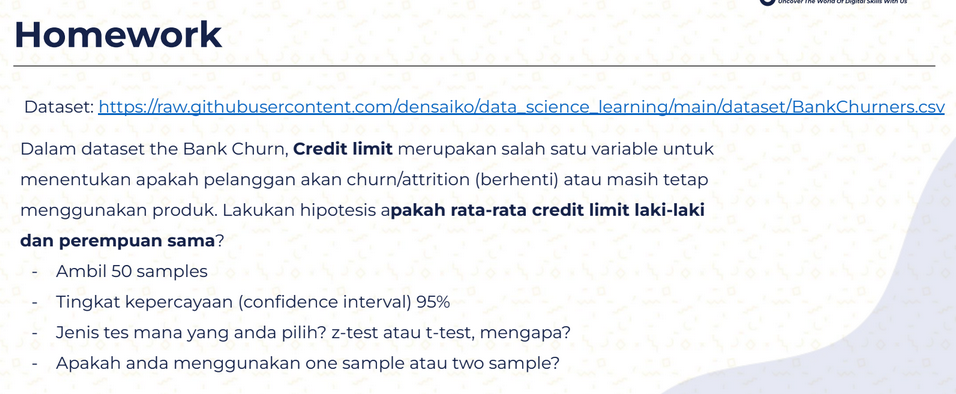

In [ ]:
!pip install --upgrade statsmodels

     |████████████████████████████████| 9.8 MB 5.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
import math

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


**Stratified Sampling**

In [ ]:
CL_F = data[data['Gender'] == 'F']
CL_F.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
14,712396908,Existing Customer,57,F,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279,0.000114,0.999890
19,709327383,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080,0.000055,0.999940
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.996160,0.003836


In [ ]:
CL_M = data[data['Gender'] == 'M']
CL_M.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988


In [ ]:
data.groupby(['Gender'], as_index=True).apply(lambda x: x.sample(n=200, random_state=50))


CLIENTNUM  ... Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
Gender                  ...                                                                                                                                   
F      9116  823539558  ...                                           0.999820                                                                                
       8790  716098683  ...                                           0.999890                                                                                
       7289  809127858  ...                                           0.999900                                                                                
       6112  712446783  ...                                           0.001844                                                                                
       471   710665533  ...                                           0.999830                                                                                
...                ...  ...                                                ...                                                                                
M      4637  789182358  ...                                           0.999950                                                                                
       884   715848408  ...                                           0.999920                                                                                
       1620  715055433  ...                                           0.999450                                                                                
       4578  715844733  ...                                           0.999820                                                                                
       6549  716381808  ...                                           0.999860                                                                                

[400 rows x 23 columns]

In [ ]:
pd.pivot_table(data, values = 'Credit_Limit', index=["Gender"], 
               aggfunc=['mean'])

,mean
,Credit_Limit
Gender,
F,5023.854274
M,12685.674963


**Hypothesis Testing**



*   Z-test, hal ini dikarenakan jumlah sample melebihi 30 data



In [ ]:
#populasi
pop_std = data['Credit_Limit'].std()
pop_avg = data['Credit_Limit'].mean()

print("Population - STD:",round(pop_std))
print("Population - mean:",round(pop_avg))

Population - STD: 9089
Population - mean: 8632


**Menggunakan two sample**

In [ ]:


confidence_level = 0.95
alpha = 1-confidence_level

# Credit_Limit - Famele
CL_F = data[data['Gender'] == 'F']
p_CL_F = CL_F['Credit_Limit'].mean()
s_CL_F = CL_F['Credit_Limit'].sample(50)

# Credit_Limit- Male
CL_M = data[data['Gender'] == 'M']
p_CL_M = CL_M['Credit_Limit'].mean()
s_CL_M = CL_M['Credit_Limit'].sample(50)

# Difference between population 
difference = p_CL_F-p_CL_M
# print('Difference between population mean: {:.2f}'.format(difference))

# ttest hypothesis
ztest_Score, pvalue = ztest(x1=s_CL_F, x2=s_CL_M, value=0, alternative = 'two-sided') 
print (f'ztest_Score: {round(ztest_Score,2)}, p-value:{round(pvalue,2)}')
# test
if alpha > pvalue:
  print("Reject the hypothesis")
  print("Because the pvalue {:.2f} < {:.2f}".format(pvalue, alpha))
else:
  print("Accept the hypothesis")
  print("Because the pvalue {:.2f} > {:.2f}".format(pvalue, alpha))

ztest_Score: -2.59, p-value:0.01
Reject the hypothesis
Because the pvalue 0.01 < 0.05


Berdasarkan hasil analisis dapat dilihat bahwa nilai pvalue lebih kecil dari 0.05 yang berarti bahwa H0 ditolak atau dapat diartikan bahwa rata-rata credit limit laki-laki tidak sama dengan rata-rata credit limit perempuan. 

In [ ]:
hm = pd.read_csv('https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/BankChurners.csv')
hm.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
#separate the gender 
male = hm[hm['Gender'] == "M"]
female = hm[hm['Gender'] == "F"]

#get the sample
m_cl = male['Credit_Limit'].sample(50)
f_cl = female['Credit_Limit'].sample(50)

alpha = 1-0.95
ztest, pvalue = ztest(x1=m_cl, x2=f_cl, value=0)

#test
if alpha > pvalue:
  print("Reject the hypothesis")
  print("Because the pvalue {:.2f} < {:.2f}".format(pvalue, alpha))

elif alpha < pvalue:
  print("Accept the hypothesis")
  print("Because the pvalue {:.2f} > {:.2f}".format(pvalue, alpha))

Reject the hypothesis
Because the pvalue 0.00 < 0.05
